# FeedForward Neural Network

\begin{align*}
\text{Input Layer} \quad (l &= 1): \\
a^{(1)} &= x \\
\\
\text{Hidden Layers} \quad (l &= 2, 3, \ldots, L-1): \\
z^{(l)} &= W^{(l)} a^{(l-1)} + b^{(l)} \\
a^{(l)} &= f^{(l)}(z^{(l)}) \\
\\
\text{Output Layer} \quad (l &= L): \\
z^{(L)} &= W^{(L)} a^{(L-1)} + b^{(L)} \\
\hat{y} &= a^{(L)} = f^{(L)}(z^{(L)})
\end{align*}


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the architecture of the one-layer feedforward neural network
class OneLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(OneLayerNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)  # Fully connected layer

    def forward(self, x):
        x = self.fc(x)
        return x

# Example usage
if __name__ == "__main__":
    # Define input and output sizes
    input_size = 10
    output_size = 20

    # Create an instance of the one-layer feedforward neural network
    model = OneLayerNN(input_size, output_size)

    # Define some input data (batch size of 1 for simplicity)
    input_data = torch.randn(1, input_size)

    # Perform forward pass
    output = model(input_data)

    print("Output:", output)


Output: tensor([[-0.1021,  0.0580, -0.2614,  0.5490,  0.1675,  0.3489,  0.3475,  0.1543,
         -0.9033,  0.0632, -0.2966, -0.2084, -0.5957,  0.4958, -0.0149,  0.4346,
          0.1016, -0.1424, -0.4270, -0.5088]], grad_fn=<AddmmBackward0>)


In [2]:
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters:", total_params)


Total number of parameters: 220


In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 = 784, flattened input image
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# One-layer neural network model
class OneLayerNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(OneLayerNN, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input image
        out = self.fc(x)
        return out

# Initialize the model
model = OneLayerNN(input_size, num_classes).to(device)



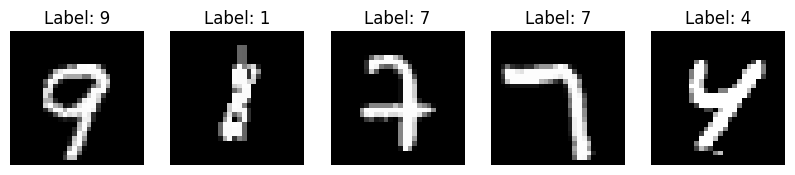

In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 5
random_indices = np.random.randint(len(train_dataset), size=num_samples)

# Plot the samples
fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))

for i, idx in enumerate(random_indices):
    image, label = train_dataset[idx]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title('Label: {}'.format(label))
    axes[i].axis('off')

plt.show()


In [5]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch [1/5], Step [100/600], Loss: 0.7832
Epoch [1/5], Step [200/600], Loss: 0.5741
Epoch [1/5], Step [300/600], Loss: 0.4599
Epoch [1/5], Step [400/600], Loss: 0.4176
Epoch [1/5], Step [500/600], Loss: 0.4179
Epoch [1/5], Step [600/600], Loss: 0.4531
Epoch [2/5], Step [100/600], Loss: 0.2875
Epoch [2/5], Step [200/600], Loss: 0.4429
Epoch [2/5], Step [300/600], Loss: 0.3340
Epoch [2/5], Step [400/600], Loss: 0.2901
Epoch [2/5], Step [500/600], Loss: 0.3567
Epoch [2/5], Step [600/600], Loss: 0.2418
Epoch [3/5], Step [100/600], Loss: 0.4628
Epoch [3/5], Step [200/600], Loss: 0.2397
Epoch [3/5], Step [300/600], Loss: 0.3857
Epoch [3/5], Step [400/600], Loss: 0.3552
Epoch [3/5], Step [500/600], Loss: 0.4305
Epoch [3/5], Step [600/600], Loss: 0.1911
Epoch [4/5], Step [100/600], Loss: 0.2794
Epoch [4/5], Step [200/600], Loss: 0.4188
Epoch [4/5], Step [300/600], Loss: 0.4213
Epoch [4/5], Step [400/600], Loss: 0.3870
Epoch [4/5], Step [500/600], Loss: 0.2308
Epoch [4/5], Step [600/600], Loss:

In [8]:
outputs.shape

torch.Size([100, 10])

In [7]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 92.34 %


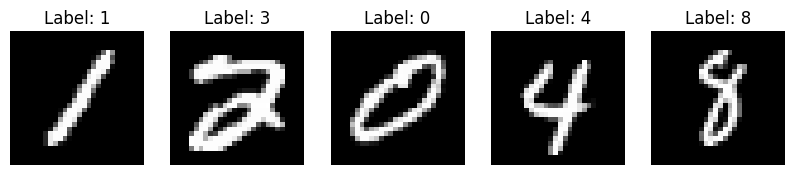

In [18]:
# Visualize the test dataset
import matplotlib.pyplot as plt
import numpy as np

num_samples = 5
random_indices = np.random.randint(len(images), size=num_samples)

# Plot the samples
fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))

for i, idx in enumerate(random_indices):
    image = images[idx]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title('Label: {}'.format(predicted[idx]))
    axes[i].axis('off')

plt.show()
